In [1]:
# prompt: load in this dataset from hugging face using python: https://huggingface.co/datasets/marcov/sms_spam_promptsource

import sklearn
import time
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# 1. Extracting and Cleaning Data

## 1.1 Loading the dataset

In [2]:
import pandas as pd

data = pd.read_parquet("hf://datasets/marcov/sms_spam_promptsource/data/train-00000-of-00001.parquet")
data.head()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


,sms,label,template_name,template,rendered_input,rendered_output
0,"Go until jurong point, crazy.. Available only ...",0,ham_True_False,"Is this sms message considered {{""ham""}} (i.e....",Is this sms message considered ham (i.e. not s...,True
1,Ok lar... Joking wif u oni...\n,0,ham_True_False,"Is this sms message considered {{""ham""}} (i.e....",Is this sms message considered ham (i.e. not s...,True
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,ham_True_False,"Is this sms message considered {{""ham""}} (i.e....",Is this sms message considered ham (i.e. not s...,False
3,U dun say so early hor... U c already then say...,0,ham_True_False,"Is this sms message considered {{""ham""}} (i.e....",Is this sms message considered ham (i.e. not s...,True
4,"Nah I don't think he goes to usf, he lives aro...",0,ham_True_False,"Is this sms message considered {{""ham""}} (i.e....",Is this sms message considered ham (i.e. not s...,True


## 1.2 Getting relevant data

In [3]:
# Getting relevant data
df = data[data['template_name'] == 'ham_True_False']

# Dropping irrelevant columns
df = df.drop(columns=['template_name', 'template', 'rendered_input', 'rendered_output'])
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


# 2. Data Preprocessing and Exploratory Data Analysis

## 2.1 Data Visualization

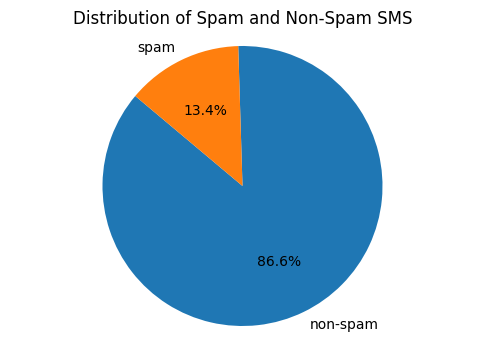

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df['label'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(df['label'].value_counts(), labels=['non-spam','spam'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam and Non-Spam SMS')
plt.axis('equal')
plt.show()

## 2.2 Feature Engineering (Adding Length, Number of Words, and Number of Sentences as features)

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
from wordcloud import WordCloud

df['Length_of_SMS'] = df['sms'].apply(len)
df['words_in_sms'] = df['sms'].apply(word_tokenize).apply(len)
df['sentences_in_sms'] = df['sms'].apply(sent_tokenize).apply(len)
df.head()

spam_length = df[df['label'] == 1]['Length_of_SMS'].mean()
ham_length = df[df['label'] == 0]['Length_of_SMS'].mean()

spam_words = df[df['label'] == 1]['words_in_sms'].mean()
ham_words = df[df['label'] == 0]['words_in_sms'].mean()

spam_sentences = df[df['label'] == 1]['sentences_in_sms'].mean()
ham_sentences = df[df['label'] == 0]['sentences_in_sms'].mean()

## 2.3 Data Visualization of New Features

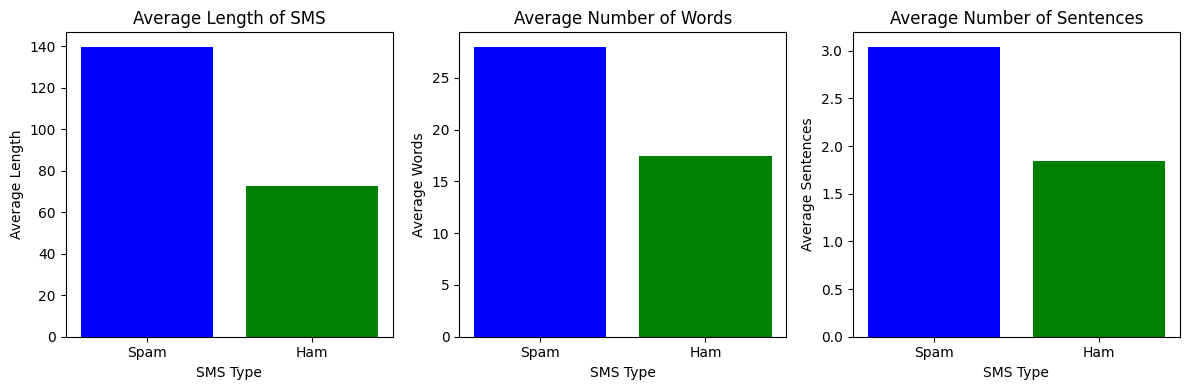

Average Length of Spam SMS: 139.68
Average Length of Ham SMS: 72.47
Average Number of Words in Spam SMS: 28.00
Average Number of Words in Ham SMS: 17.44
Average Number of Sentences in Spam SMS: 3.04
Average Number of Sentences in Ham SMS: 1.85


In [6]:
# Plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns of plots

# Length
axes[0].bar(['Spam', 'Ham'], [spam_length, ham_length], color=['blue', 'green'])
axes[0].set_title('Average Length of SMS')
axes[0].set_xlabel('SMS Type')
axes[0].set_ylabel('Average Length')

# Words
axes[1].bar(['Spam', 'Ham'], [spam_words, ham_words], color=['blue', 'green'])
axes[1].set_title('Average Number of Words')
axes[1].set_xlabel('SMS Type')
axes[1].set_ylabel('Average Words')

# Sentences
axes[2].bar(['Spam', 'Ham'], [spam_sentences, ham_sentences], color=['blue', 'green'])
axes[2].set_title('Average Number of Sentences')
axes[2].set_xlabel('SMS Type')
axes[2].set_ylabel('Average Sentences')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

# Neater print statements
print(f"{'Average Length of Spam SMS: '}{spam_length:.2f}")
print(f"{'Average Length of Ham SMS: '}{ham_length:.2f}")
print(f"{'Average Number of Words in Spam SMS: '}{spam_words:.2f}")
print(f"{'Average Number of Words in Ham SMS: '}{ham_words:.2f}")
print(f"{'Average Number of Sentences in Spam SMS: '}{spam_sentences:.2f}")
print(f"{'Average Number of Sentences in Ham SMS: '}{ham_sentences:.2f}")

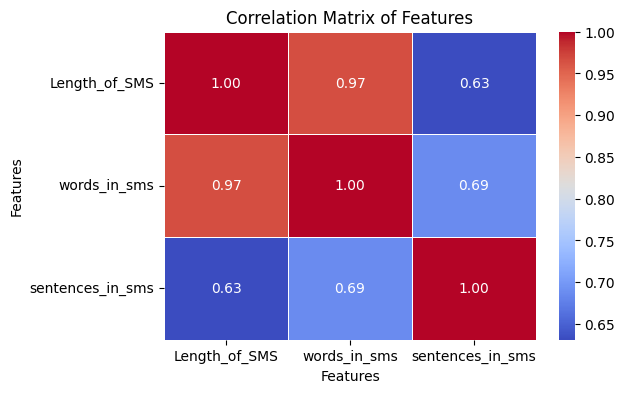

In [7]:
correlation_matrix = df[['Length_of_SMS', 'words_in_sms', 'sentences_in_sms']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

## 2.4 Text Preprocessing

In [8]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    tokens = nltk.word_tokenize(text)  # Tokenize
    tokens = [token for token in tokens if token.isalnum()] #remove special characters
    tokens = [token for token in tokens if token not in stop_words]  # Remove stop words
    stemmer = nltk.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens] # Stemming
    return " ".join(tokens)

df['processed_sms'] = df['sms'].apply(preprocess_text)
df.head()

,sms,label,Length_of_SMS,words_in_sms,sentences_in_sms,processed_sms
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...\n,0,30,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,50,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1,nah think goe usf live around though


## 2.5 More Data Visualization

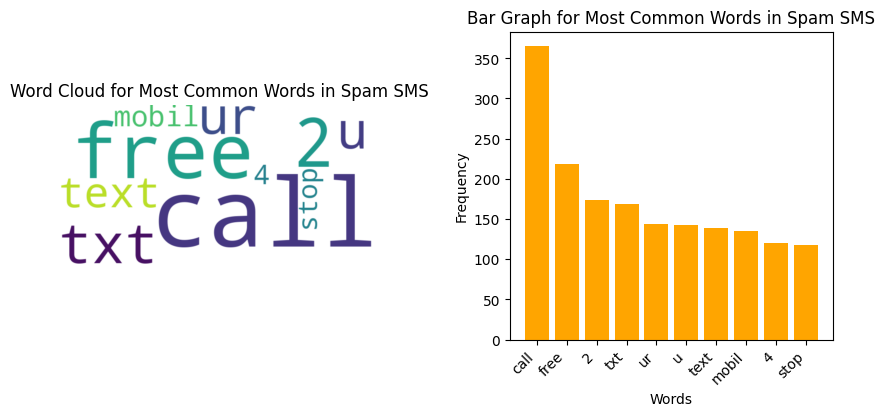

In [9]:
# Finding the most common words in spam SMS texts

# Creating the wordcloud
spam = df[df['label'] == 1]['processed_sms']
spam_words = ' '.join(spam).split()
word_counts = Counter(spam_words)
most_common_words = word_counts.most_common(10)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))

# Displaying the wordcloud
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Most Common Words in Spam SMS')
plt.axis('off')

# Plot Bar Graph
plt.subplot(1, 2, 2)
words, counts = zip(*most_common_words)
plt.bar(words, counts, color='orange')
plt.title('Bar Graph for Most Common Words in Spam SMS')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.subplots_adjust(wspace=0.4)
plt.show()

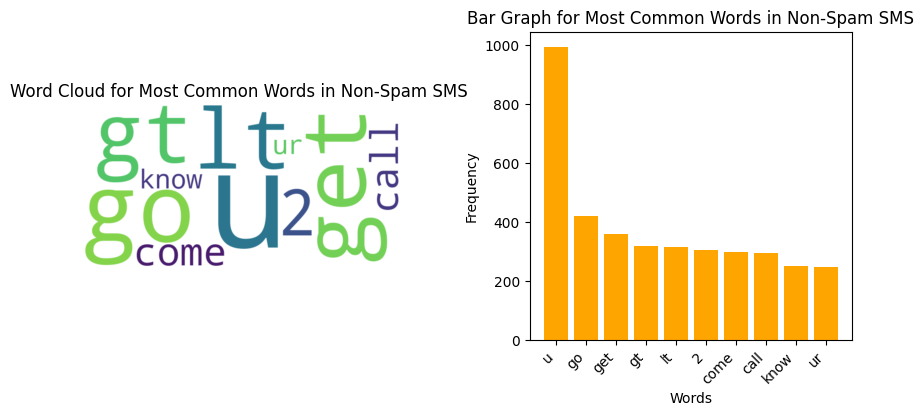

In [10]:
# Finding the most common words in non-spam SMS texts

ham = df[df['label'] == 0]['processed_sms']
ham_words = ' '.join(ham).split()
word_counts = Counter(ham_words)
most_common_words = word_counts.most_common(10)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Most Common Words in Non-Spam SMS')
plt.axis('off')

# Plot Bar Graph
plt.subplot(1, 2, 2)
words, counts = zip(*most_common_words)
plt.bar(words, counts, color='orange')
plt.title('Bar Graph for Most Common Words in Non-Spam SMS')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.subplots_adjust(wspace=0.4)
plt.show()


# 3. Data Splitting, Vectorization, and Model Building

## 3.1 Data Splitting and Vectorization

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
#data spliting and vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['processed_sms']).toarray()
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3.2 Building an SVM model

### 3.2.1 Fitting the model

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

# Initialize SVM model with probability estimates enabled
svc_classifier = SVC(kernel='linear', probability=True)  # Ensure probability=True before fitting

# Generate learning curve (Using Accuracy instead of Log Loss to avoid probability errors)
train_sizes, train_scores, val_scores = learning_curve(
    svc_classifier, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)


# Compute mean training and validation accuracy scores
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

train_loss = -train_scores.mean(axis=1)  # Negate to get positive loss values
val_loss = -val_scores.mean(axis=1)

# Train the SVM model on the full training set
svc_classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

### 3.2.2 Classification Report - SVM

In [13]:
from sklearn.metrics import classification_report

# Test model
y_pred_svc = svc_classifier.predict(X_test)

# Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.98      0.89      0.94       161

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### 3.2.3 Learning Curve and Loss Function - SVM

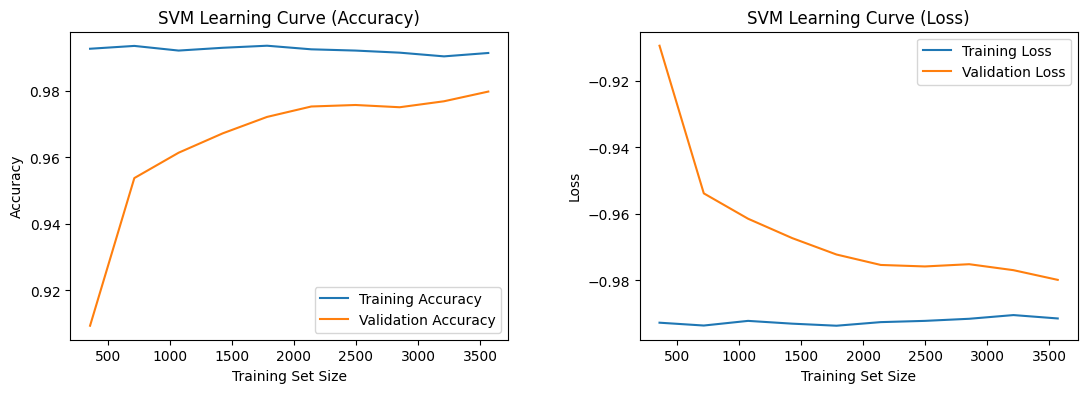

In [14]:
# Plot Learning Curve and Loss functions

fig, axes = plt.subplots(1, 2, figsize=(13, 4))  # 1 row, 2 columns

axes[0].plot(train_sizes, train_mean, label="Training Accuracy")
axes[0].plot(train_sizes, val_mean, label="Validation Accuracy")
axes[0].set_xlabel("Training Set Size")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("SVM Learning Curve (Accuracy)")
axes[0].legend()

# Plot Loss Learning Curve
axes[1].plot(train_sizes, train_loss, label="Training Loss")
axes[1].plot(train_sizes, val_loss, label="Validation Loss")
axes[1].set_xlabel("Training Set Size")
axes[1].set_ylabel("Loss")
axes[1].set_title("SVM Learning Curve (Loss)")
axes[1].legend()

plt.subplots_adjust(wspace=0.3)
plt.show()

### 3.2.4 Confusion Matrix - SVM

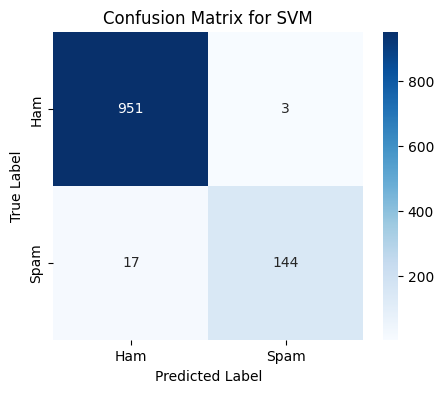

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate and plot confusion matrix

cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM")
plt.show()

### 3.2.5 Receiver Operating Characteristic (ROC) Curve - SVM

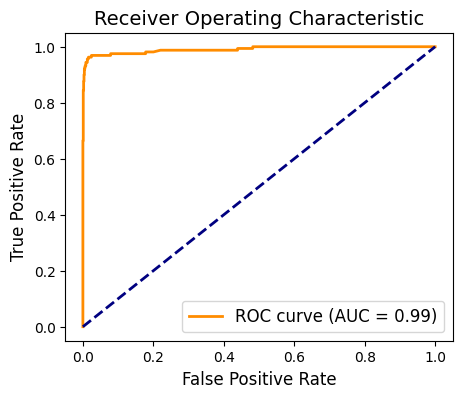

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculating ROC
y_prob_svc = svc_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_svc)
roc_auc = roc_auc_score(y_test, y_prob_svc)

# Plot ROC Curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Diagonal line for random classifier
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.xlim(-0.05,1.05)
plt.title("Receiver Operating Characteristic", fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.show()

## 3.3 Building a Neural Network

### 3.3.1 Fitting the Model with Appropriate Layers and Finding Test Accuracy

In [17]:
#NeoroNetwork
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)
test_loss, test_acc = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred_nn = (y_pred > 0.5).astype(int)

print(f"\nTest Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.8680 - loss: 0.4591 - val_accuracy: 0.9002 - val_loss: 0.1814
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9619 - loss: 0.1144 - val_accuracy: 0.9742 - val_loss: 0.0921
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9915 - loss: 0.0374 - val_accuracy: 0.9720 - val_loss: 0.0982
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9939 - loss: 0.0169 - val_accuracy: 0.9720 - val_loss: 0.1166
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9971 - loss: 0.0120 - val_accuracy: 0.9709 - val_loss: 0.1264
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9990 - loss: 0.0062 - val_accuracy: 0.9709 - val_loss: 0.1313
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0046 - val_accuracy: 0.9709 - val_loss: 0.1529
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9994 - loss: 0.0022 - val_accuracy: 0

### 3.3.2 Classification Report - Neural Network

In [18]:
# Evaluate model performance
print("Classification Report:")
cr = classification_report(y_test, y_pred_nn)
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       954
           1       0.95      0.89      0.92       161

    accuracy                           0.98      1115
   macro avg       0.96      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



### 3.3.3 Learning Curve and Loss Function - Neural Network

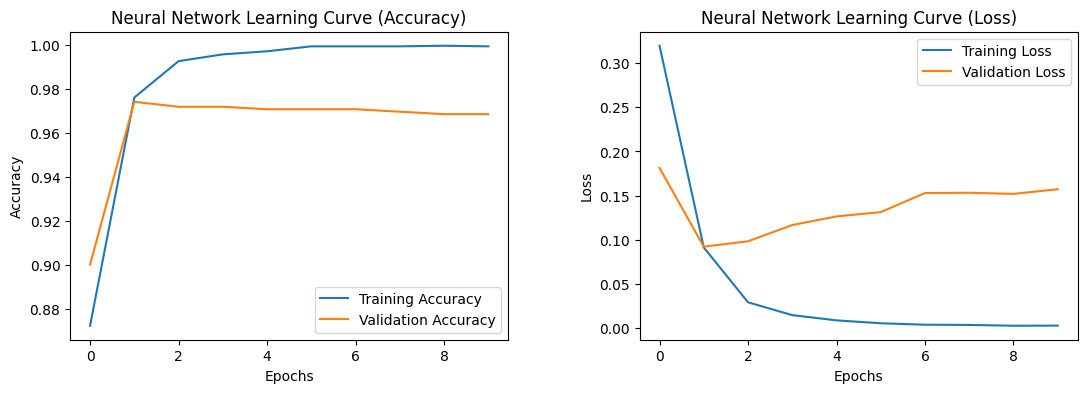

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))  # 1 row, 2 columns of plots

# Accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Neural Network Learning Curve (Accuracy)')
axes[0].legend()

# Loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].set_title('Neural Network Learning Curve (Loss)')
axes[1].legend()

plt.subplots_adjust(wspace=0.3)
plt.show()

### 3.3.4 Confusion Matrix - Neural Network

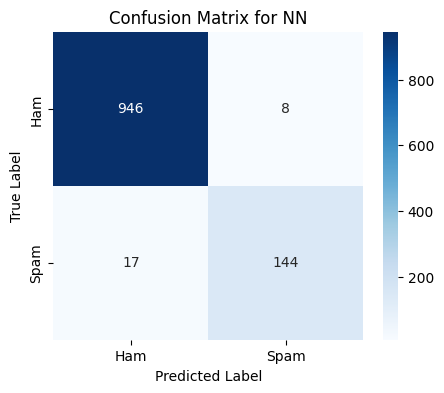

In [20]:
# Generate and plot confusion matrix

cm = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for NN")
plt.show()

### 3.3.5 Receiver Operating Characteristic (ROC) Curve - Neural Network

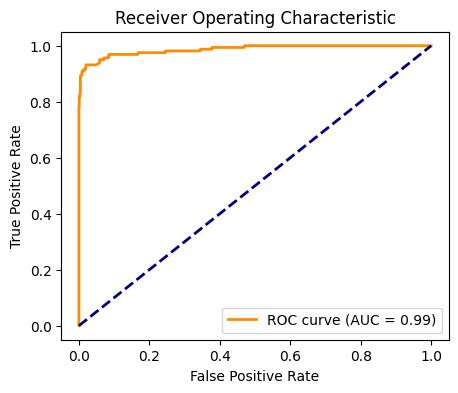

In [21]:
# Calculate ROC curve and AUC
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred)
roc_auc_nn = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## 3.4 Building a Feed-Forward Neural Network (Uses Dropout, L2 Regularization, Batch Normalization, and Other Techniques to Prevent Overfitting)

### 3.4.1 Fitting the Model with Appropriate Layers and Finding Test Accuracy

In [22]:
from scipy.sparse import csr_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

model = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01), input_shape=(X_train.shape[1],)),  # First hidden layer with L2 regularization
    layers.BatchNormalization(),  # Batch Normalization
    layers.Dropout(0.3),  # Dropout layer (30%) to prevent overfitting
    layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),  # Second hidden layer with L2 regularization
    layers.BatchNormalization(),  # Batch Normalization
    layers.Dropout(0.3),  # Dropout layer (30%)
    layers.Dense(1, activation='sigmoid')  # Output layer with Sigmoid
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train with Early Stopping
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred_ffnn = (y_pred > 0.5).astype(int)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.6312 - loss: 1.5760 - val_accuracy: 0.8556 - val_loss: 0.9403
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9528 - loss: 0.6719 - val_accuracy: 0.8556 - val_loss: 0.7091
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9814 - loss: 0.4347 - val_accuracy: 0.8933 - val_loss: 0.4895
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9918 - loss: 0.2839 - val_accuracy: 0.9309 - val_loss: 0.3629
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9870 - loss: 0.2317 - val_accuracy: 0.9704 - val_loss: 0.2595
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9711 - loss: 0.2430
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Test Accuracy: 0.9704


### 3.4.2 Classification Report - Feed-Forward Neural Network

In [23]:
# Evaluate model performance
print("Classification Report:")
cr = classification_report(y_test, y_pred_ffnn)
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       954
           1       0.99      0.80      0.89       161

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



### 3.4.3 Learning Curve and Loss Function - Feed-Forward Neural Network

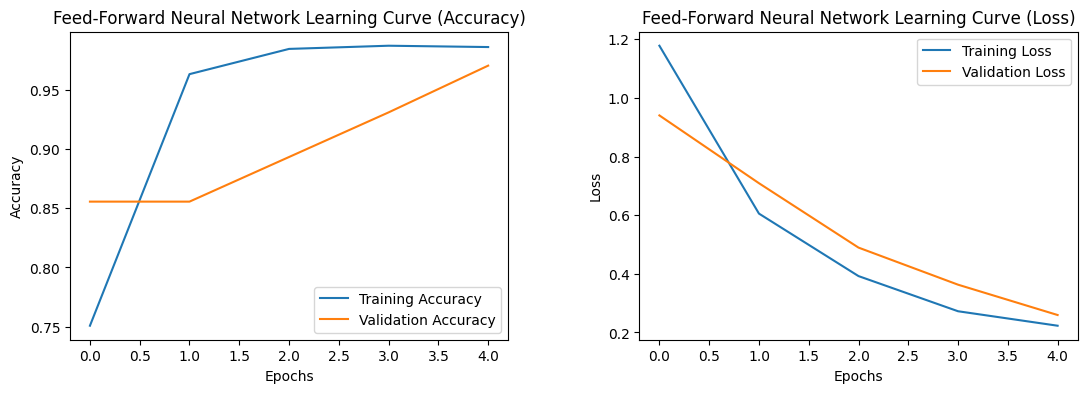

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))  # 1 row, 2 columns of plots

# Accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Feed-Forward Neural Network Learning Curve (Accuracy)')
axes[0].legend()

# Loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].set_title('Feed-Forward Neural Network Learning Curve (Loss)')
axes[1].legend()

plt.subplots_adjust(wspace=0.3)
plt.show()


### 3.4.4 Confusion Matrix - Feed-Forward Neural Network

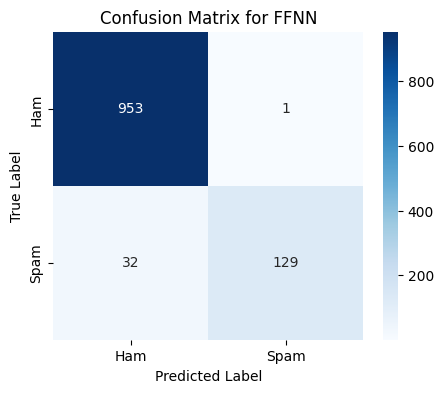

In [25]:
# Generate and plot confusion matrix

cm = confusion_matrix(y_test, y_pred_ffnn)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for FFNN")
plt.show()

### 3.4.5 Receiver Operating Characteristic (ROC) Curve - Feed-Forward Neural Network

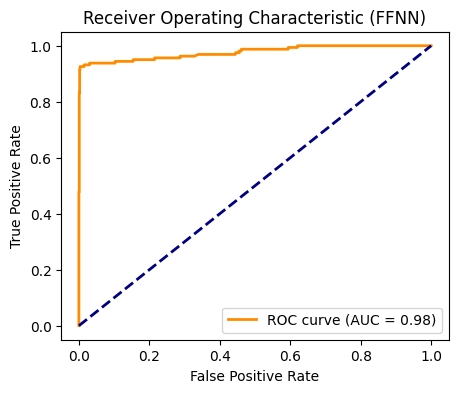

In [26]:
# Calculate ROC curve and AUC
fpr_ffnn, tpr_ffnn, thresholds_ffnn = roc_curve(y_test, y_pred)
roc_auc_ffnn = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr_ffnn, tpr_ffnn, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_ffnn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (FFNN)')
plt.legend(loc='lower right')
plt.show()

## 3.5 Building a Random Forest Classification Model

### 3.5.1 Fitting the Model and Finding Test Accuracy

In [27]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf) # Calculate accuracy
print(f"\nTest Accuracy: {accuracy_rf:.4f}") # Print accuracy


Test Accuracy: 0.9821


### 3.5.2 Classification Report - Random Forest

In [28]:
# Evaluate model performance
print("Classification Report:")
cr = classification_report(y_test, y_pred_rf)
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.99      0.88      0.93       161

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### 3.5.3 Learning Curve and Loss Function - Random Forest

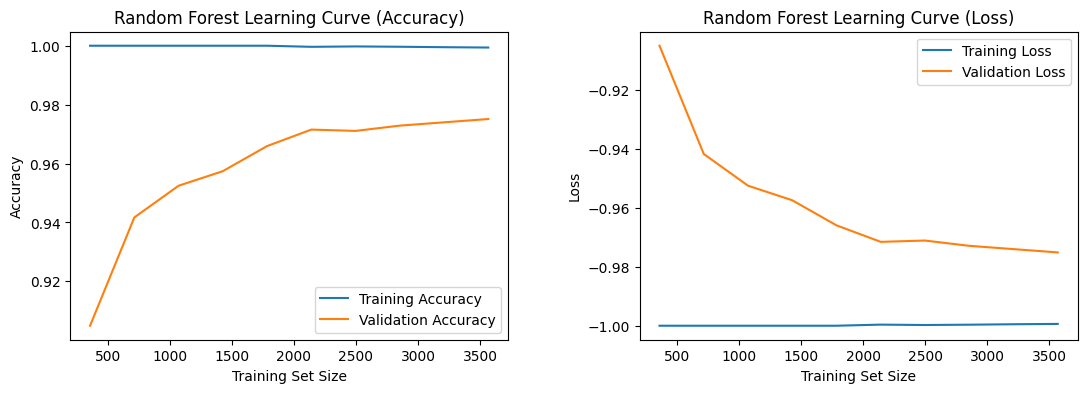

In [29]:
# Generate learning curve (Using Accuracy instead of Log Loss to avoid probability errors)
train_sizes_rf, train_scores_rf, val_scores_rf = learning_curve(
    rf_classifier, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean training and validation accuracy scores
train_mean_rf = train_scores_rf.mean(axis=1)
val_mean_rf = val_scores_rf.mean(axis=1)

train_loss_rf = -train_scores_rf.mean(axis=1)  # Negate to get positive loss values
val_loss_rf = -val_scores_rf.mean(axis=1)

# Plot Learning Curve and Loss functions
fig, axes = plt.subplots(1, 2, figsize=(13, 4))  # 1 row, 2 columns

axes[0].plot(train_sizes_rf, train_mean_rf, label="Training Accuracy")
axes[0].plot(train_sizes_rf, val_mean_rf, label="Validation Accuracy")
axes[0].set_xlabel("Training Set Size")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Random Forest Learning Curve (Accuracy)")
axes[0].legend()

# Plot Loss Learning Curve
axes[1].plot(train_sizes_rf, train_loss_rf, label="Training Loss")
axes[1].plot(train_sizes_rf, val_loss_rf, label="Validation Loss")
axes[1].set_xlabel("Training Set Size")
axes[1].set_ylabel("Loss")
axes[1].set_title("Random Forest Learning Curve (Loss)")
axes[1].legend()

plt.subplots_adjust(wspace=0.3)
plt.show()

### 3.5.4 Confusion Matrix - Random Forest

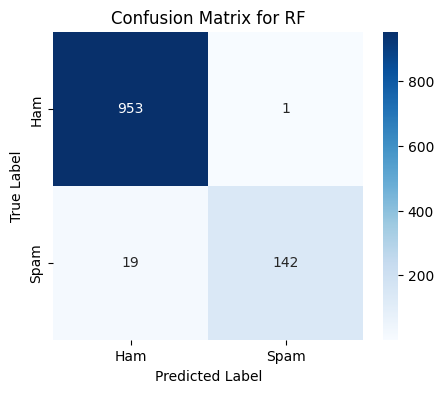

In [30]:
# Generate and plot confusion matrix

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for RF")
plt.show()

### 3.5.5 Receiver Operating Characteristic (ROC) Curve - Random Forest

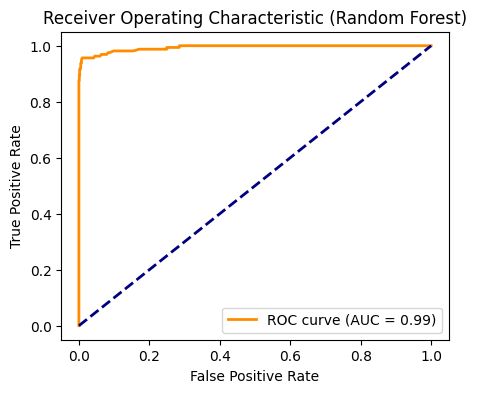

In [31]:
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot the ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()


## 3.6 Building a Naive Bayes Classification Model

### 3.6.1 Fitting the Model and Finding Test Accuracy

In [32]:
from sklearn.naive_bayes import MultinomialNB

best_accuracy = 0
best_model = None
best_alpha = None
best_fit_prior = None
best_cm = None
best_classification_report = None

# Grid search over alpha values from 0.1 to 1.0 and fit_prior settings True and False
for alpha in np.arange(0.1, 1.1, 0.1):
    for fit_prior in [True, False]:
        nb_model = MultinomialNB(alpha=alpha, fit_prior=fit_prior)
        nb_model.fit(X_train, y_train)

        y_pred_nb = nb_model.predict(X_test)
        accuracy_nb = accuracy_score(y_test, y_pred_nb)
        print(f"MultinomialNB(alpha={alpha}, fit_prior={fit_prior}) Accuracy: {accuracy_nb:.4f}")

        # Update best model if current model is better
        if accuracy_nb > best_accuracy:
            best_accuracy = accuracy_nb
            best_model = nb_model
            best_alpha = alpha
            best_fit_prior = fit_prior
            best_cm = confusion_matrix(y_test, y_pred_nb)
            best_classification_report = classification_report(y_test, y_pred_nb, output_dict=True)

# Bootstrapping to compute 95% confidence interval for the best model's accuracy
def bootstrap_accuracy(y_true, y_pred, n_bootstraps=1000, seed=42):
    np.random.seed(seed)
    n = len(y_true)
    bootstrapped_scores = []

    for _ in range(n_bootstraps):
        indices = np.random.randint(0, n, n)
        score = accuracy_score(np.array(y_true)[indices], np.array(y_pred)[indices])
        bootstrapped_scores.append(score)

    lower = np.percentile(bootstrapped_scores, 2.5)
    upper = np.percentile(bootstrapped_scores, 97.5)
    return lower, upper

# Use the best model's predictions for bootstrapping
y_pred_nb = best_model.predict(X_test)
ci_lower, ci_upper = bootstrap_accuracy(y_test, y_pred_nb)

print(f"\nBest model accuracy: {best_accuracy:.2%}")
print(f"95% Confidence Interval: [{ci_lower:.2%}, {ci_upper:.2%}]")

MultinomialNB(alpha=0.1, fit_prior=True) Accuracy: 0.9794
MultinomialNB(alpha=0.1, fit_prior=False) Accuracy: 0.9525
MultinomialNB(alpha=0.2, fit_prior=True) Accuracy: 0.9803
MultinomialNB(alpha=0.2, fit_prior=False) Accuracy: 0.9453
MultinomialNB(alpha=0.30000000000000004, fit_prior=True) Accuracy: 0.9812
MultinomialNB(alpha=0.30000000000000004, fit_prior=False) Accuracy: 0.9435
MultinomialNB(alpha=0.4, fit_prior=True) Accuracy: 0.9794
MultinomialNB(alpha=0.4, fit_prior=False) Accuracy: 0.9390
MultinomialNB(alpha=0.5, fit_prior=True) Accuracy: 0.9803
MultinomialNB(alpha=0.5, fit_prior=False) Accuracy: 0.9345
MultinomialNB(alpha=0.6, fit_prior=True) Accuracy: 0.9803
MultinomialNB(alpha=0.6, fit_prior=False) Accuracy: 0.9336
MultinomialNB(alpha=0.7000000000000001, fit_prior=True) Accuracy: 0.9803
MultinomialNB(alpha=0.7000000000000001, fit_prior=False) Accuracy: 0.9345
MultinomialNB(alpha=0.8, fit_prior=True) Accuracy: 0.9803
MultinomialNB(alpha=0.8, fit_prior=False) Accuracy: 0.9354
Mu

### 3.6.2 Classification Report - Naive Bayes

In [33]:
# Evaluate model performance
print("Classification Report:")
cr = classification_report(y_test, y_pred_nb)
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.99      0.88      0.93       161

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### 3.6.3 Learning Curve and Loss Function - Naive Bayes

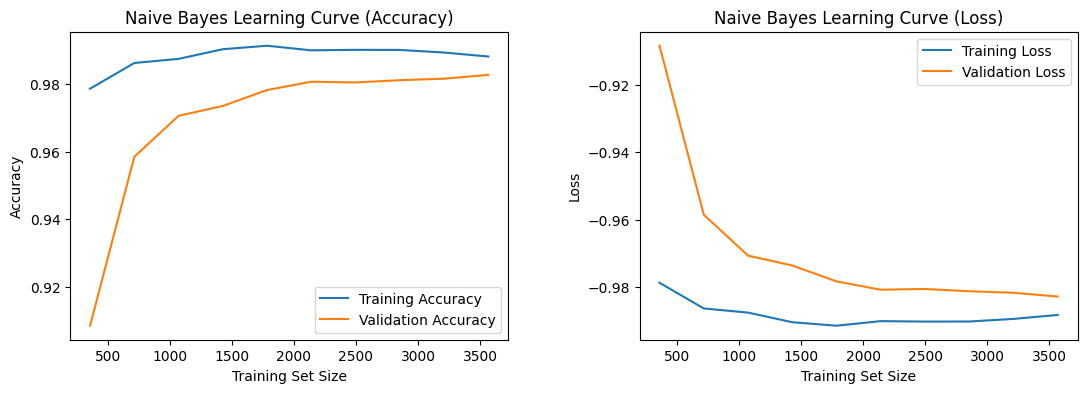

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Use the best model found in the previous grid search (best_model)
train_sizes_nb, train_scores_nb, val_scores_nb = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean scores and loss
train_mean_nb = train_scores_nb.mean(axis=1)
val_mean_nb = val_scores_nb.mean(axis=1)
train_loss_nb = -train_scores_nb.mean(axis=1)
val_loss_nb = -val_scores_nb.mean(axis=1)

# Plot learning curves
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

axes[0].plot(train_sizes_nb, train_mean_nb, label="Training Accuracy")
axes[0].plot(train_sizes_nb, val_mean_nb, label="Validation Accuracy")
axes[0].set_xlabel("Training Set Size")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Naive Bayes Learning Curve (Accuracy)")
axes[0].legend()

axes[1].plot(train_sizes_nb, train_loss_nb, label="Training Loss")
axes[1].plot(train_sizes_nb, val_loss_nb, label="Validation Loss")
axes[1].set_xlabel("Training Set Size")
axes[1].set_ylabel("Loss")
axes[1].set_title("Naive Bayes Learning Curve (Loss)")
axes[1].legend()

plt.subplots_adjust(wspace=0.3)
plt.show()


### 3.6.4 Confusion Matrix - Naive Bayes

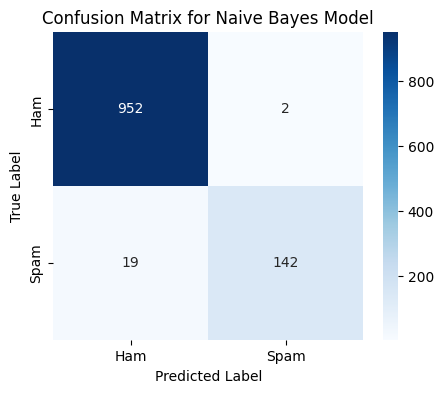

In [35]:
# Generate and plot confusion matrix

plt.figure(figsize=(5, 4))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Naive Bayes Model")
plt.show()


### 3.6.5 Receiver Operating Characteristic (ROC) Curve - Naive Bayes

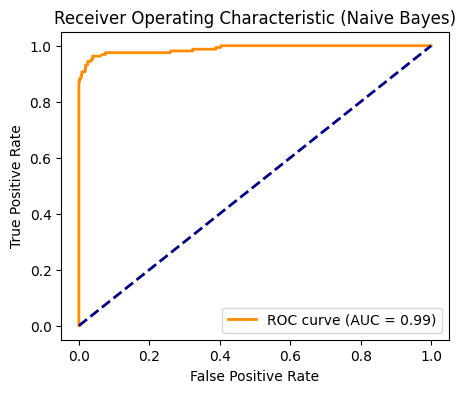

In [36]:
y_prob_nb = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)

# Plot the ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Naive Bayes)')
plt.legend(loc="lower right")
plt.show()

# 4. Evaluating the Models

In [37]:
import pickle

# Export the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

In [38]:
# prompt: print the evaluation of all the models compared with each other

print("Model Evaluation Comparison:")
print("---------------------------")

# Assuming 'accuracy_rf', 'test_acc', etc. are defined from the previous code cells
#  and contain the accuracy scores of different models.

# Replace placeholders with actual results if available.
models = {
    'Random Forest': accuracy_rf,
    'Neural Network': test_acc,
    'Feed-Forward NN': test_accuracy,
    'Naive Bayes': best_accuracy,
    'SVM': None # Add SVM accuracy
}

for model_name, accuracy in models.items():
    print(f"{model_name}: {accuracy:.4f}" if accuracy is not None else f"{model_name}: Accuracy not available")

# Further evaluation metrics comparison can be added here.
# For example, compare Precision, Recall, F1-score, AUC score from classification_reports.


Model Evaluation Comparison:
---------------------------
Random Forest: 0.9821
Neural Network: 0.9776
Feed-Forward NN: 0.9704
Naive Bayes: 0.9812
SVM: Accuracy not available
